# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Extraemos los datos

url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)

# Vamos a ver el top 5 del set
print (df.head())



     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [2]:
print (df.shape)


(48895, 16)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Sacamos las primeras conclusiones:

Tenemos un total de 48895 filas = Apartamentos en NY
Tenemos un total de 16 columnas:

De estas columnas Last Review y Reviews per month tienen casi 10k menos de datos (irrelevantes)

3 Columnas con numeros decimales
7 columnas con numeros enteros 
6 columnas categoricas



In [4]:
# Vamos a ver si hay algun dato repetido, la columna ID tendria que ser consecutiva
print(f"El numero de ID's repetidos es: {df['id'].duplicated().sum()}")

El numero de ID's repetidos es: 0


In [5]:
# Quiero borrar las columnas  last reviews y reviews per month name y ID

df.drop(["id","last_review","reviews_per_month","name"]axis=1 Inplace=True)

print (df.head())

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3234433644.py, line 3)

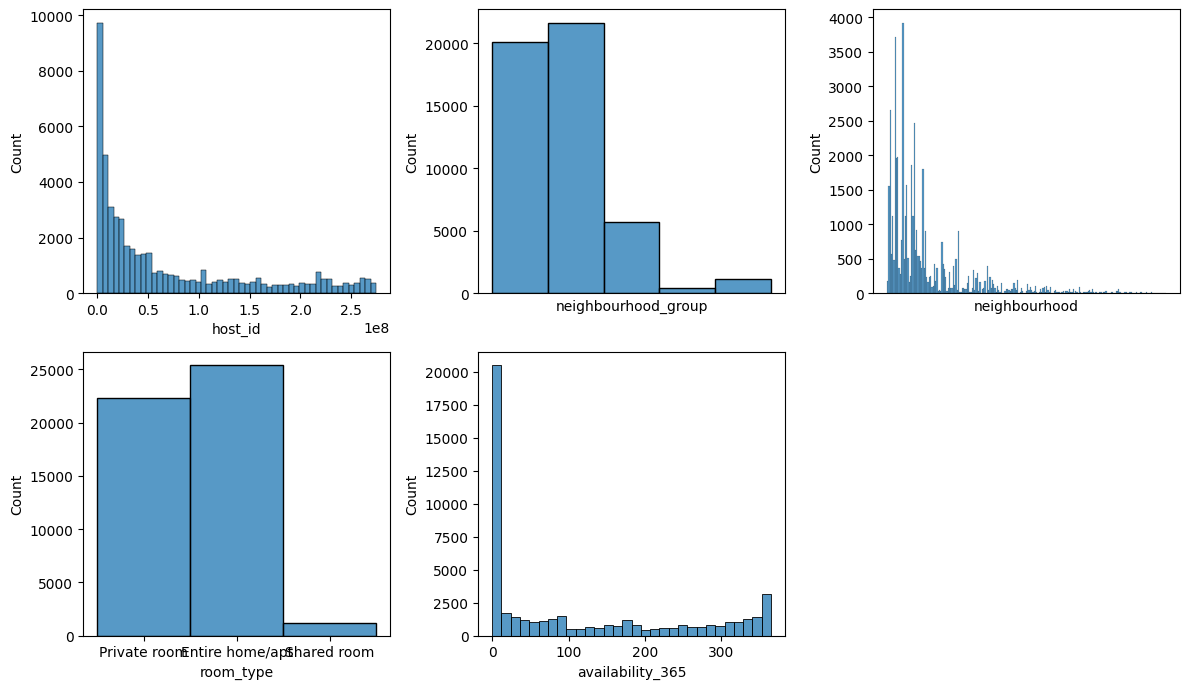

In [ ]:
# Analisis de las variables categoricas



# Definimos que la estructura del grafico va a tener 2 filas de subgraficos y 3 columnas
fig, axis = plt.subplots(2, 3, figsize=(12, 7))

# Histogramas de cada variable preguntar por set_xticks y por fig.delaxes
sns.histplot(ax = axis[0,0], data = df, x = "host_id")
sns.histplot(ax = axis[0,1], data = df, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = df, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = df, x = "room_type")
sns.histplot(ax = axis[1,1], data = df, x = "availability_365")
fig.delaxes(axis[1, 2]) 


plt.tight_layout()


plt.show()

No entiendo del todo bien los graficos

HOST_ID: La gran mayoria de apartamentos son de diferentes host id, pero podemos ver que hay host id que tienen varios apartamentos

Neighbourhood_group: 5 grupos urbanos, en 2 de ellos es donde mayor concentracion hay de apartamentos

Room_type: Hay mas apartamentos enteros que habitaciones privadas y hay mas habitaciones privadas que compartidas.


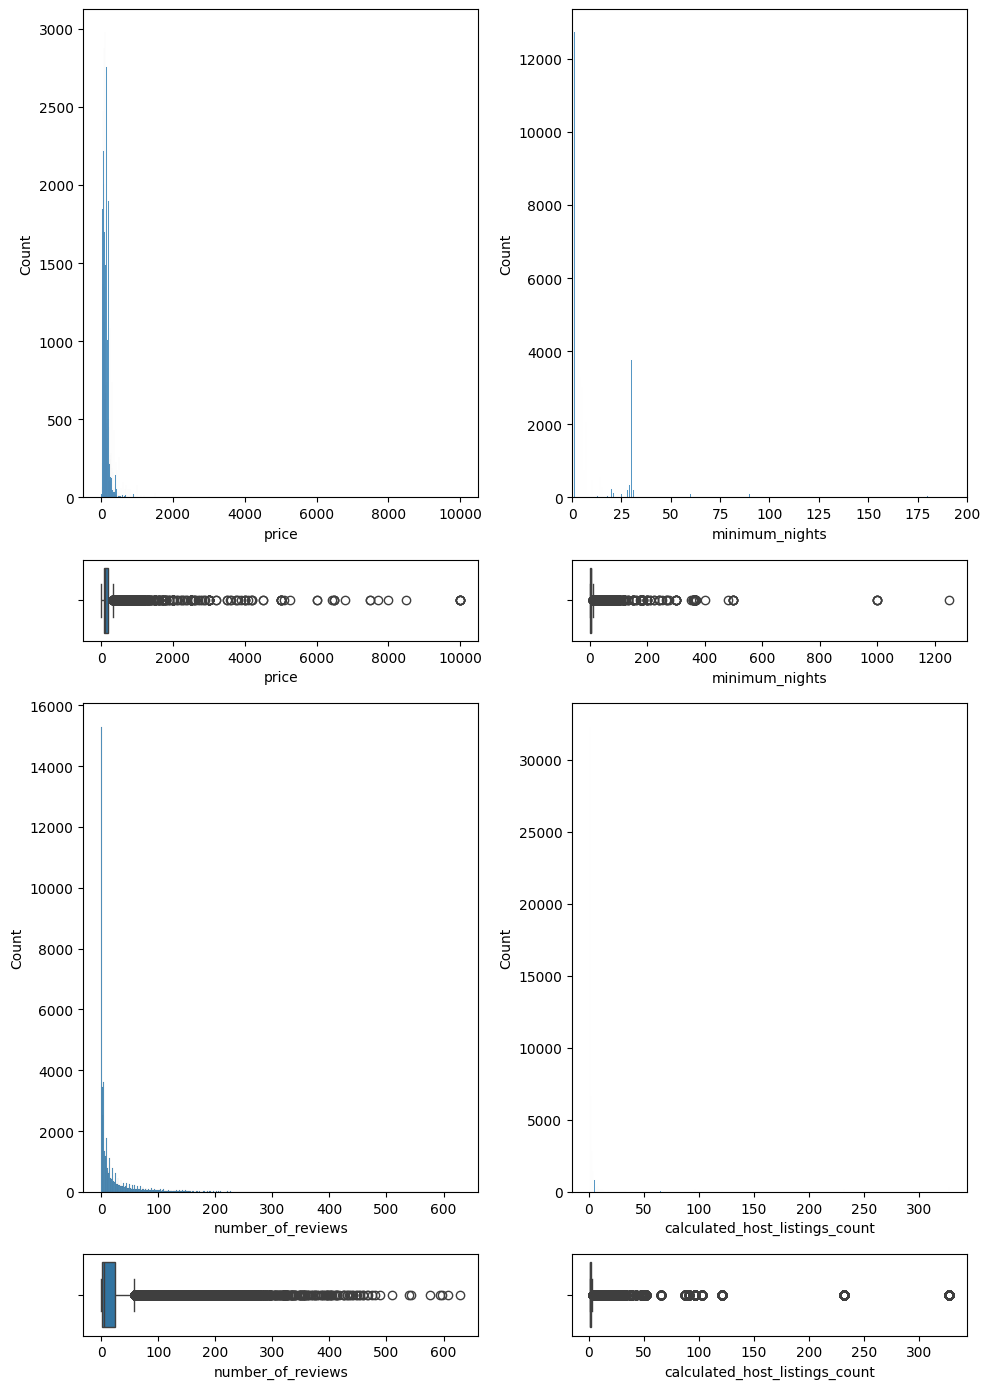

In [ ]:
# Analisis de variables numericas

# Las variables numericas son: * Precio * Numero de noches * Latitud y Longitud? * Disponibilidad de dias y * Minimo de nochjes
#Definimos estructura 4 filas x 2 columnas preguntrar por height ratios
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = df, x = "price")
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Precio: 
Numero de reviews
Minimo de noches
Calculated Host Listings

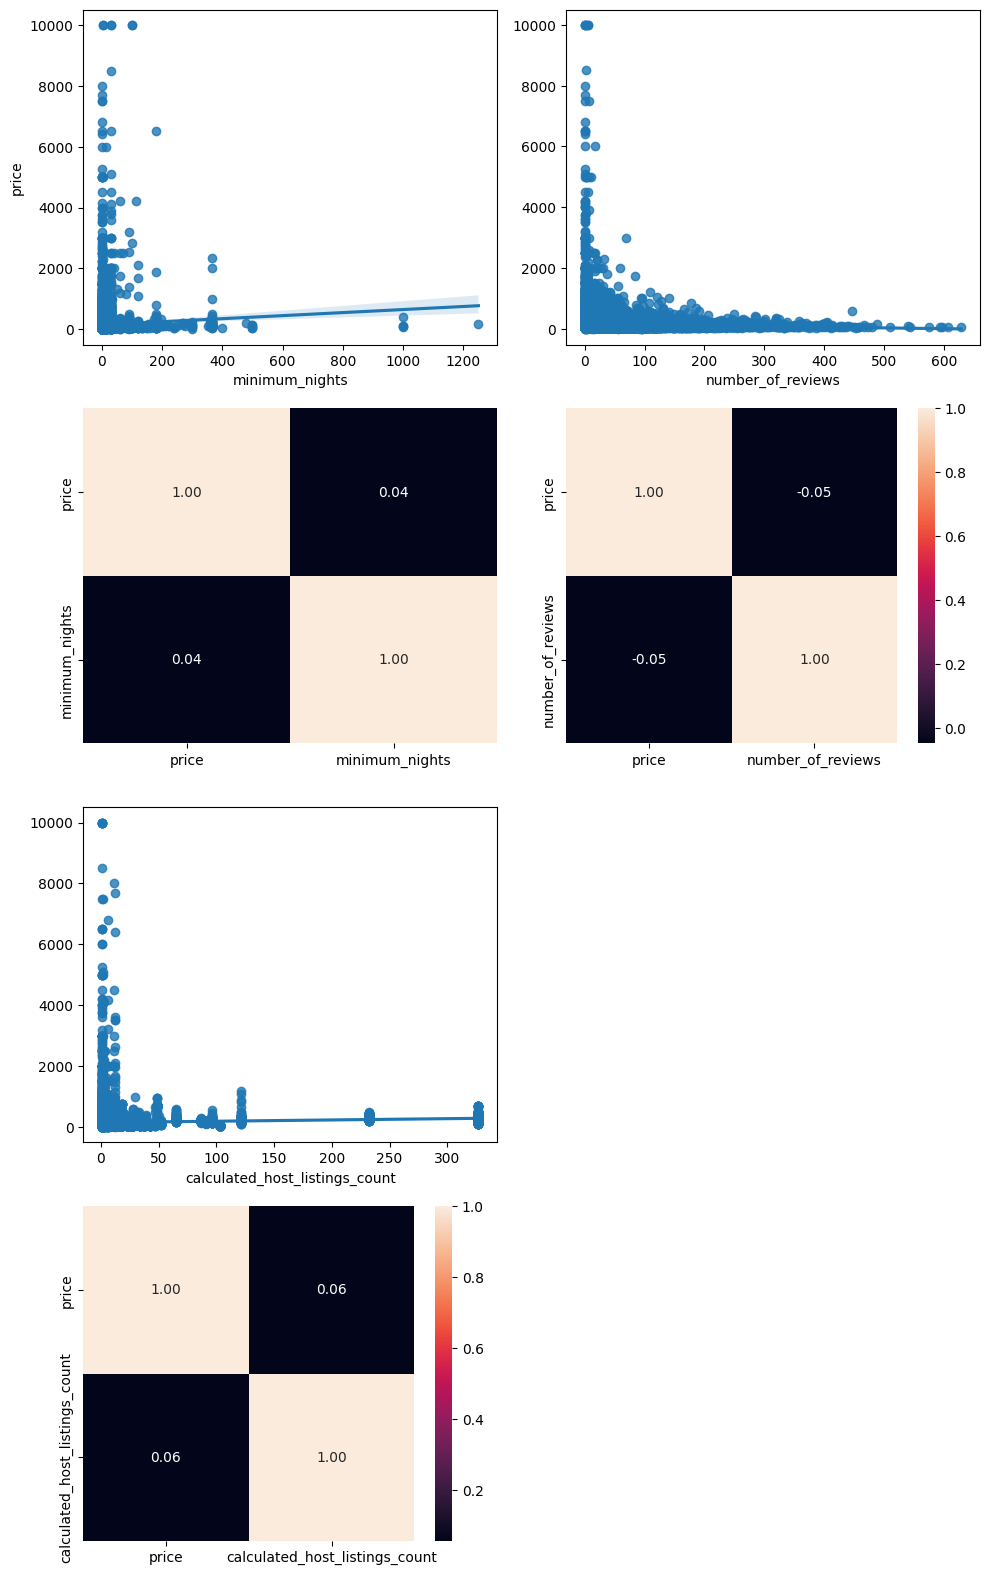

In [8]:
# Analisis de multivariables

fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Quiero analizar correlaciones entre variables

sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])


plt.tight_layout()


plt.show()

Podemos observar en los mapas de calor que no existe una correlacion entre los pares Precio/nºdenoches y Precio/nºreviews

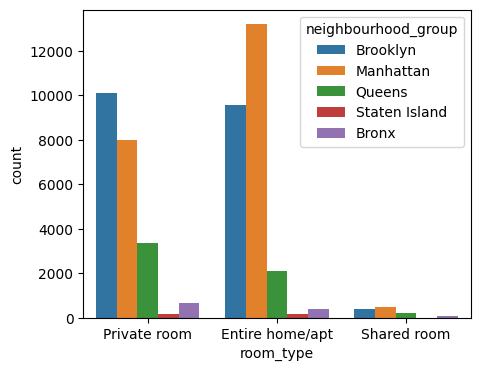

In [10]:
# Analisis variables categoricas-categoricas Tipo de Alojamiento x Neighbourhood

fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

Anteriormente habiamos identificado que los ABNB se concetraban en 2 lugares principalmente; ahora podemos afirmar que estos barrios son Manhattan que cuenta mayoritariamente con apartamentos enteros aunque tambien hay bastante oferta de habitaciones privadas, el otro nucle urbano es Brooklyn que a diferencia de Manhattan cuenta casi con la misma oferta de habitaciones privadas que de apartamentos enteros.

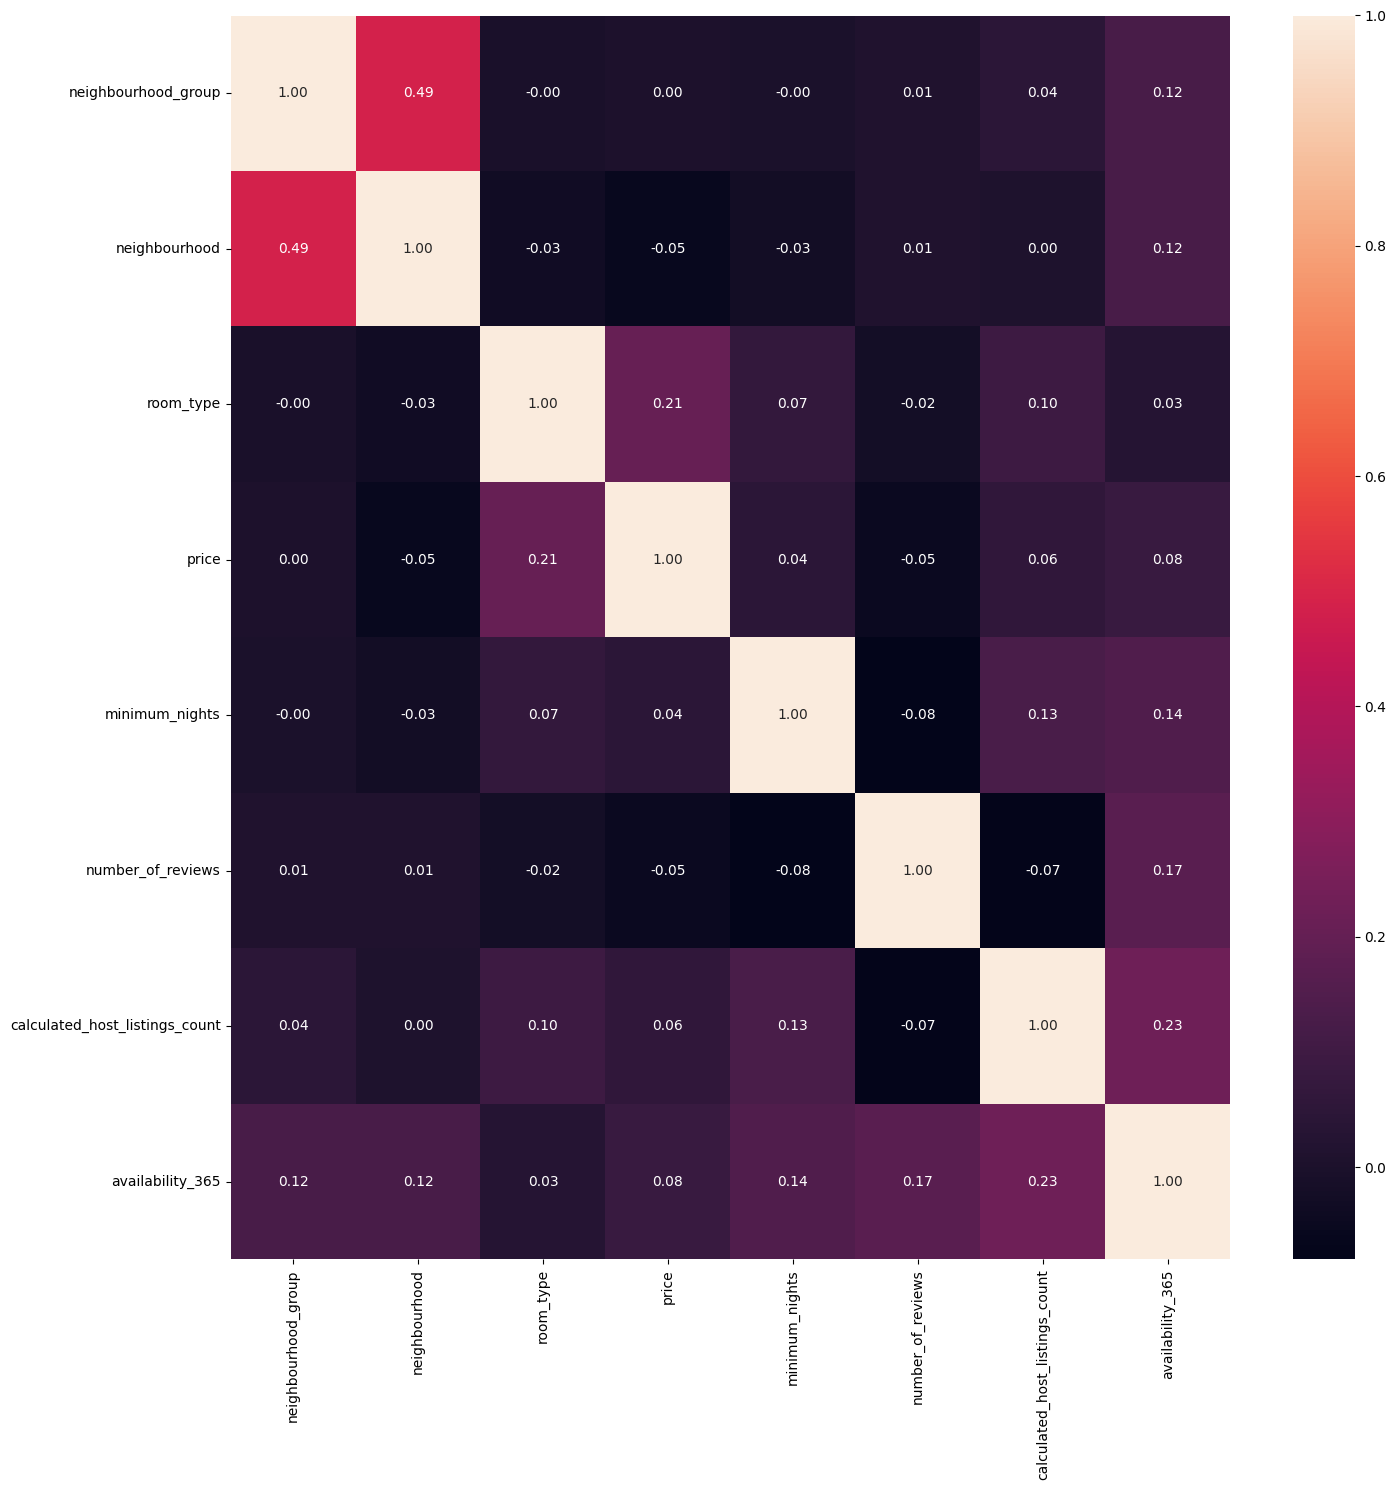

In [11]:
# Factorize the Room Type and Neighborhood Data (preguntar por la factorizacion?)
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()


plt.show()

Podemos obsrvar una pequeña muy pequeña correlacion entre todos los datos, lo mas remarcable es la correlacion entre Precio y Tipo de alojamiento


DUDA: COMO PODRIA ANALIZAR LA CORRELACION ENTRE ELLAS? POR SENTIDO COMUN ENTIENDO QUE SI OPTAS POR ALOJAMIENTO ENTERO EN VEZ DE HABITACION PRIVADA EL PRECIO AUMENTARA, COMO PUEDO DEMOSTRARLO?


In [12]:
df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


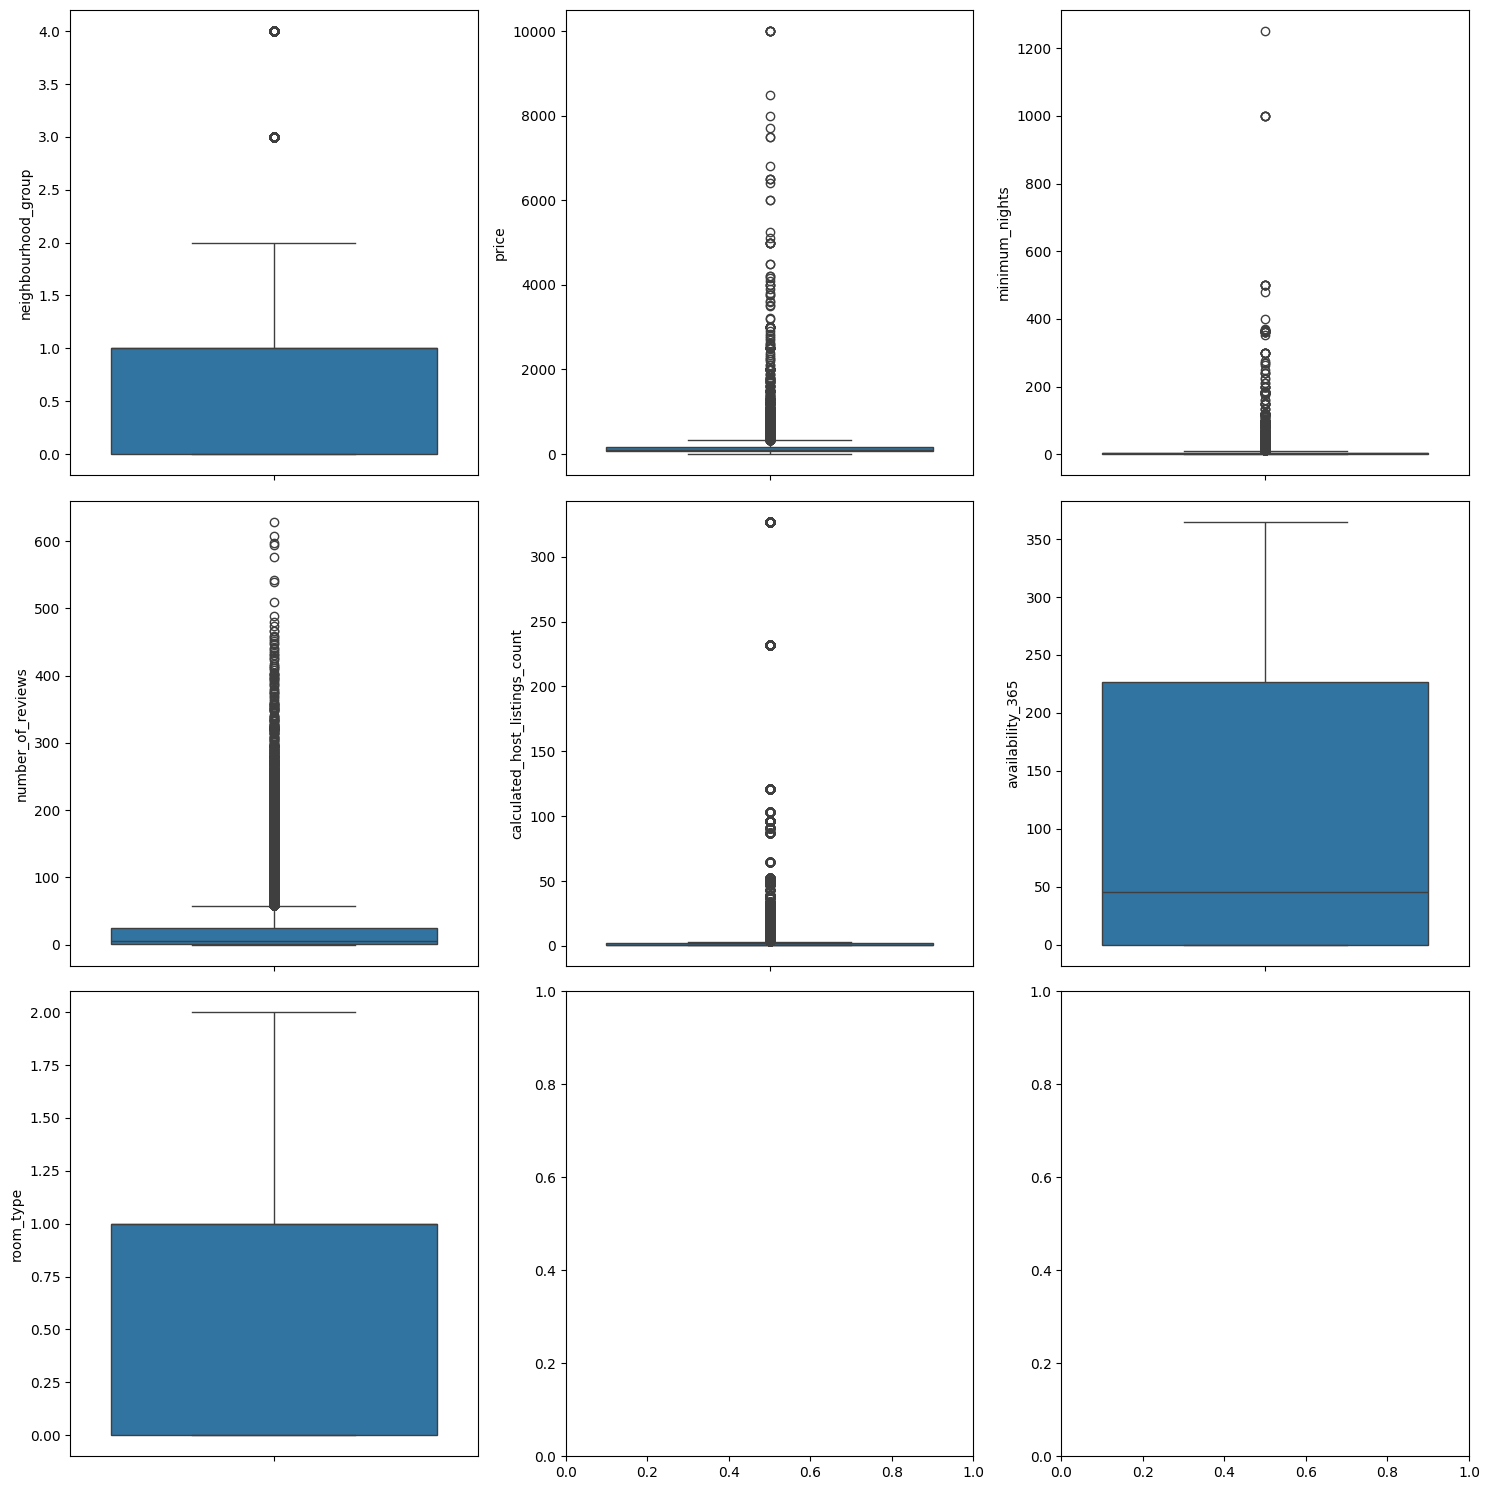

In [14]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = df, y = "price")
sns.boxplot(ax = axes[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = df, y = "room_type")

plt.tight_layout()

plt.show()

De estos graficos vamos a seleccionar las variables que presentan un grafico con datos desperdigados:
1. Precio
2. Minimum Nights
3. Number of reviews
4. Calculated Host Listings


In [16]:
# Vamos a buscar outliers data son datos puntuales, que fastidian mi muestra:

price_data = df["price"].describe()

print(price_data)

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
